<a href="https://colab.research.google.com/github/nyp-sit/sdaai-iti107/blob/main/data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Exercise: Data Augmentation

In our previous exercise with the cats and dogs dataset, our validation accuracy stalls at 75%. Because we only have relatively few training samples (2400), overfitting is going to be our number one concern. Overfitting is caused by having too few samples to learn from, rendering our model to be unable to generalize to new data. Given infinite data, our model would be exposed to every possible aspect of the data distribution at hand: we would never overfit. Data augmentation takes the approach of generating more training data from existing training samples, by "augmenting" the samples via a number of random transformations that yield believable-looking images. This helps the model get exposed to more aspects of the data and generalize better. 

***Note***

TF2.7 seems to have some bug in saving and loading keras model with data augmentation layer. We will revert to TF2.6 until the issues are resolved. Run the following cell to install TF2.6 instead.

In [ ]:
!pip install tensorflow==2.6
!pip install keras==2.6

     |████████████████████████████████| 1.3 MB 25.4 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0


In [ ]:
import tensorflow as tf
import tensorflow.keras as keras

In [ ]:
%pip freeze

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argcomplete==1.12.3
argon2-cffi==21.1.0
arviz==0.11.4
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.2.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==4.1.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.10
cached-property==1.5.2
cachetools==4.2.4
catalogue==1.0.0
certifi==2021.10.8
cffi==1.15.0
cftime==1.5.1.1
chardet==3.0.4
charset-normalizer==2.0.7
clang==5.0
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.7
cvxpy==1.0.31
cycler==0.11.0
cymem==2.0.6
Cython==0.29.24
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.4
distribut

## Create train and validation dataset

We will go ahead and download the same 'cats and dogs' dataset, and setup the training and validation dataset.

In [ ]:
import os 

dataset_URL = 'https://nyp-aicourse.s3-ap-southeast-1.amazonaws.com/datasets/cats_and_dogs_subset.tar.gz'
tf.keras.utils.get_file(origin=dataset_URL, extract=True, cache_dir='.')
dataset_folder = os.path.join('datasets', 'cats_and_dogs_subset')

batch_size = 16
image_size = (128,128)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_folder,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='binary'
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_folder,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='binary'
)

67051520/67041740 [==============================] - 7s 0us/step
Found 3000 files belonging to 2 classes.
Using 2400 files for training.
Found 3000 files belonging to 2 classes.
Using 600 files for validation.


## Using Keras Data Augmentation layer


Since tensorflow 2.2, Keras has introduced new types of layers for doing image data augmentation, such as Random Cropping, Random Flipping, etc. Previously, we have to depend on `ImageDataGenerator` (which is a lot slower) to do so. Before tensorflow 2.6, they are available as experimental layers (in the `tf.keras.layers.experimental.preprocessing` package), but has been officially supported from tensorflow 2.6 onwards (i.e. available as part of the `tf.keras.layers`).

In the code below, we will check the tensorflow version and instantiate the correct layer depending on the version. We use only one RandomRotation layer in the example below. The value `0.3` refers to the maximum rotation angle in both clock-wise and anti-clockwise direction. You can find out more info from the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomRotation)

In [ ]:
if tf.version.VERSION >= '2.6.0':
    data_augmentation = keras.Sequential(
        [
            keras.layers.RandomRotation(0.3)
        ]
    )
else: 
    data_augmentation = keras.Sequential(
        [
            keras.layers.experimental.preprocessing.RandomRotation(0.3)
        ]
    )


To see the effects of data augmentation, let us apply our data_augmentation layer to a sample image.

(1, 128, 128, 3)


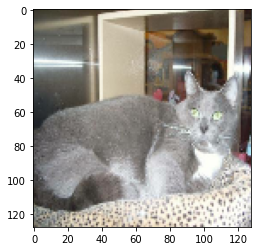

In [ ]:
import matplotlib.pyplot as plt 

images, _ = next(train_ds.take(1).as_numpy_iterator())
sample_image = images[0]/255.
plt.imshow(sample_image)
sample_image = tf.expand_dims(sample_image, 0)
print(sample_image.shape)

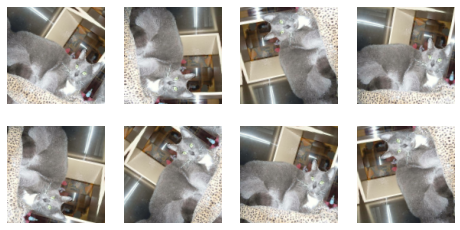

In [ ]:
plt.figure(figsize=(8, 4))
for i in range(8):
    augmented_image = data_augmentation(sample_image)
    ax = plt.subplot(2, 4, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

**Exercise 1:**

Modify `data_augmention` above to add in [Random Flipping](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomFlip) and [Random Zoom](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomZoom). Choose the appropriate values for the flipping and cropping heights/widths. 

<details><summary>Click here for answer</summary>

```python

data_augmentation = keras.Sequential(
    [
        keras.layers.RandomRotation(0.3),
        keras.layers.RandomFlip(mode="horizontal"),
        keras.layers.RandomZoom(0.2)
    ]
)
```
</details>


In [ ]:
# data_augmentation = ??
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomRotation(0.3),
        keras.layers.RandomFlip(mode="horizontal"),
        keras.layers.RandomZoom(0.2)
    ]
)

**Exercise 2:**

Modify `make_model()` to apply data augmention layers you have created earlier. Where should you place your augmentation layer?

<details>
<summary>Click here for answer</summary>

```python
def make_model():

    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(128, 128, 3)))
    model.add(data_augmentation)
    model.add(keras.layers.Rescaling(scale=1./255))
    ...
    ...
    model.add(layers.Dropout(0.5))
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    return model

model = make_model()

model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])
```

</details>


In [ ]:
def make_model():

    model = keras.models.Sequential()
 
    model.add(keras.layers.Input(shape=image_size+(3,)))
    model.add(data_augmentation)
    model.add(keras.layers.Rescaling(scale=1./255))
    
    model.add(keras.layers.Conv2D(32, (3, 3)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    
    model.add(keras.layers.Conv2D(64, (3, 3)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    
    model.add(keras.layers.Conv2D(128, (3, 3)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    
    model.add(keras.layers.Conv2D(128, (3, 3)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    return model

model = make_model()

model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 128, 128, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)       

Let's train our new model with the data augmentation layer. We will need to train for more epochs, so that our network has better chance of seeing all the original images (since now we cannot guarantee that our original un-augmented image is seen every by our model every epoch).

In [ ]:
### Note: the training will take quite a while. We have previously trained the model for 100-epochs.
### You can download the checkpoints by uncommenting the following and skip the next cell "mode.fit()"

# !wget https://nyp-aicourse.s3.ap-southeast-1.amazonaws.com/it3103/checkpoints/week3-1-100epochs.zip
# !unzip week3-1-100epochs.zip

In [ ]:
## Comment out this if you just want to use the pretrained weights
def create_tb_callback(): 

    root_logdir = os.path.join(os.curdir, "tb_logs")

    def get_run_logdir():    # use a new directory for each run
        import time
        
        run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
        return os.path.join(root_logdir, run_id)

    run_logdir = get_run_logdir()

    tb_callback = keras.callbacks.TensorBoard(run_logdir)

    return tb_callback

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath="best_checkpoint",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

model.fit(train_ds, validation_data=val_ds, 
          epochs=100, 
          callbacks=[create_tb_callback(), model_checkpoint_callback])

Epoch 1/100
 38/150 [======>.......................] - ETA: 1:10 - loss: 0.9936 - accuracy: 0.5428

KeyboardInterrupt: ignored

In [ ]:
model.load_weights("best_checkpoint")
model.evaluate(val_ds)

model.save("cats_dogs_augmented_model")

Let's visualize our training using Tensorboard.

In [ ]:
%load_ext tensorboard
%tensorboard --logdir tb_logs

Thanks to data augmentation, our model has less overfitting now, as the training curves are more closely tracking the validation 
curves. We are now able to reach an validation accuracy of about 80%, slightly better than previously.

However, it would be very difficult to improve the model any further even with data augmentation. The augmented images are still heavily correlated, since they come from a small number of original images -- we cannot produce new information, we can only remix existing information. As next step to improve our accuracy on this problem, we will have to leverage transfer learning using pre-trained model, which will be the focus of next exercises.